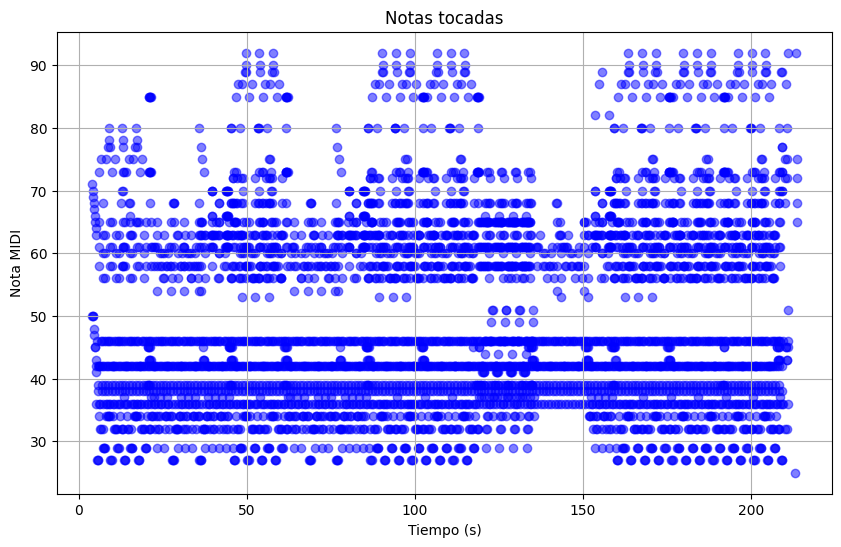

In [52]:
import matplotlib.pyplot as plt
from mido import MidiFile

mid = MidiFile('test_song.mid')  # Cargar el archivo MIDI


tiempo_actual_ticks = 0  # Tiempo actual en ticks
tiempos_ticks = []  # Lista de tiempos en ticks
notas = []  # Lista de notas

# Canal a filtrar
canal_a_filtrar = 3

# Convertir los ticks a segundos a partir de los mensajes de note_off
tiempo_actual_ticks = 0
for mensaje in mid:
    tiempo_actual_ticks += mensaje.time  # No es necesario dividir por ppqn
    if mensaje.type == 'note_off' and mensaje.channel == canal_a_filtrar:
        tiempos_ticks.append(tiempo_actual_ticks)
        notas.append(mensaje.note)


# Crear el gráfico de notas en función del tiempo
plt.figure(figsize=(10, 6))
plt.scatter(tiempos_ticks, notas, color='blue', alpha=0.5)
plt.title('Notas tocadas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Nota MIDI')
plt.grid(True)
# plt.ylim(0, 127)  # Establecer límites en el eje y para mostrar todas las notas
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mido import MidiFile

tiempo_actual_ticks = 0  # Tiempo actual en ticks
tiempos_ticks = []  # Lista de tiempos en ticks
notas = []  # Lista de notas

mid = MidiFile('test_song.mid')  # Cargar el archivo MIDI

# Cargar el archivo MIDI
ch1_mid = [mensaje for mensaje in mid if hasattr(mensaje, 'channel') and mensaje.channel == 1]

for mensaje in ch1_mid:
    tiempo_actual_ticks += mensaje.time  # No es necesario dividir por ppqn
    if mensaje.type == 'note_off':
        tiempos_ticks.append(tiempo_actual_ticks)
        notas.append(mensaje.note)

# Crear el gráfico de notas en función del tiempo
plt.figure(figsize=(10, 6))
plt.scatter(tiempos_ticks, notas, color='blue', alpha=0.5)
plt.title('Notas tocadas en función del tiempo (en ticks)')
plt.xlabel('Tiempo (ticks)')
plt.ylabel('Nota MIDI')
plt.grid(True)
plt.show()